## 데이터 로드

In [13]:
import json
import pandas as pd
import math
import numpy as np

with open('../Datasets/train.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)

In [14]:
train_data = pd.DataFrame(json_data)
train_data = train_data.drop(['id', 'plylst_title', 'updt_date'], axis=1)
train_data.head()

,tags,songs,like_cnt
0,[락],"[525514, 129701, 383374, 562083, 297861, 13954...",71
1,"[추억, 회상]","[432406, 675945, 497066, 120377, 389529, 24427...",1
2,"[까페, 잔잔한]","[83116, 276692, 166267, 186301, 354465, 256598...",17
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...","[394031, 195524, 540149, 287984, 440773, 10033...",33
4,[댄스],"[159327, 553610, 5130, 645103, 294435, 100657,...",9


In [15]:
with open('../Datasets/song_meta_with_likes.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)

In [16]:
song_data = pd.DataFrame(json_data)
song_data = song_data.drop(['album_name', 'song_gn_gnr_basket'], axis=1)
song_data.head()

,song_gn_dtl_gnr_basket,issue_date,album_id,artist_id_basket,song_name,artist_name_basket,id,like_cnt_song
0,[GN0901],20140512,2255639,[2727],Feelings,[Various Artists],0,0.616807
1,"[GN1601, GN1606]",20080421,376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[Murray Perahia],1,0.000000
2,[GN0901],20180518,4698747,[3361],Solsbury Hill (Remastered 2002),[Peter Gabriel],2,0.000000
3,"[GN1102, GN1101]",20151016,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[Matoma],3,22.996574
4,"[GN1802, GN1801]",20110824,2008470,[560160],그남자 그여자,[Jude Law],4,0.297234


## 데이터 열 이름 변경

In [17]:
train_data.rename(columns={'songs':'song_id'}, inplace=True)
train_data.head()

,tags,song_id,like_cnt
0,[락],"[525514, 129701, 383374, 562083, 297861, 13954...",71
1,"[추억, 회상]","[432406, 675945, 497066, 120377, 389529, 24427...",1
2,"[까페, 잔잔한]","[83116, 276692, 166267, 186301, 354465, 256598...",17
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...","[394031, 195524, 540149, 287984, 440773, 10033...",33
4,[댄스],"[159327, 553610, 5130, 645103, 294435, 100657,...",9


## 데이터 추출

- 500개의 플레이리스트 추출

In [18]:
train_data_sample = train_data[:2000].copy()
train_data_sample = train_data_sample.reset_index(drop=True)
#train_data_sample = train_data

In [19]:
song_data.rename(columns={'id':'song_id', 'song_gn_dtl_gnr_basket': 'gnr'}, inplace=True)
song_data = song_data.astype({'issue_date':'int64'})
song_data.head()

,gnr,issue_date,album_id,artist_id_basket,song_name,artist_name_basket,song_id,like_cnt_song
0,[GN0901],20140512,2255639,[2727],Feelings,[Various Artists],0,0.616807
1,"[GN1601, GN1606]",20080421,376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[Murray Perahia],1,0.000000
2,[GN0901],20180518,4698747,[3361],Solsbury Hill (Remastered 2002),[Peter Gabriel],2,0.000000
3,"[GN1102, GN1101]",20151016,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[Matoma],3,22.996574
4,"[GN1802, GN1801]",20110824,2008470,[560160],그남자 그여자,[Jude Law],4,0.297234


## 노래별 가중치 설정

count    591216.000000
mean         18.528749
std          73.444383
min           0.005000
25%           0.302632
50%           1.509804
75%           8.990398
max        3548.345552
Name: like_cnt_song, dtype: float64

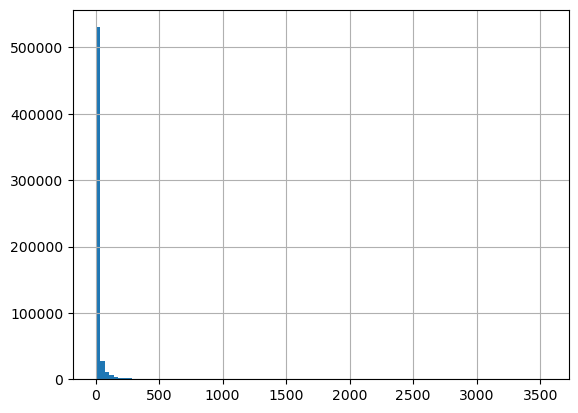

In [20]:
# 좋아요 개수 분포 확인을 위한 코드
clean_song_data = song_data[song_data['like_cnt_song'] > 0]
clean_song_data['like_cnt_song'].hist(bins=100)
clean_song_data['like_cnt_song'].describe()

In [21]:
bins = [-1, 0.001, 0.3, 1.5, 9, 3600]  # 구간 분할
labels = [0, 0.8, 0.85, 0.9, 0.95]  # 구간별 가중치 지정

song_data['weight'] = pd.cut(song_data['like_cnt_song'], bins=bins, labels=labels)  # 구간별 가중치 지정
song_data.head(10)

,gnr,issue_date,album_id,artist_id_basket,song_name,artist_name_basket,song_id,like_cnt_song,weight
0,[GN0901],20140512,2255639,[2727],Feelings,[Various Artists],0,0.616807,0.85
1,"[GN1601, GN1606]",20080421,376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[Murray Perahia],1,0.000000,0.00
2,[GN0901],20180518,4698747,[3361],Solsbury Hill (Remastered 2002),[Peter Gabriel],2,0.000000,0.00
3,"[GN1102, GN1101]",20151016,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[Matoma],3,22.996574,0.95
4,"[GN1802, GN1801]",20110824,2008470,[560160],그남자 그여자,[Jude Law],4,0.297234,0.80
5,[GN1701],20100602,911754,[475840],Para Los Enamorados,"[Bye, Lupita]",5,24.995233,0.95
6,"[GN1601, GN1602, GN1614]",20170208,10038397,"[162097, 100237]",Sibelius : Valse Triste Op.44 (시벨리우스 : 슬픈 왈츠 작...,"[Herbert Blomstedt, San Francisco Symphony]",6,0.857143,0.85
7,"[GN1601, GN1602, GN1614]",20190315,10261160,"[105210, 261542]",Superman March (From &#34;Superman&#34; / Live...,"[Los Angeles Philharmonic Orchestra, Gustavo D...",7,0.115385,0.80
8,[GN0301],20070625,353020,[224583],Lovers’ Leap (Feat. Qypthone),[애플스],8,0.000000,0.00
9,"[GN0105, GN0101]",20170320,10047088,[753752],"사랑, 그대라는 멜로디",[진호],9,7.006667,0.90


## 가중치 반영 여부 설정

In [22]:
likeWeight = True

# 한국어 -> 영어 변환
- 한국어 전처리에 어려움이 있어서, 영어로 모두 변환 후 처리

In [23]:
'''
from googletrans import Translator
import time

def trans_to_eng(tags):
    time.sleep(1)
    translator = Translator()
    translated = translator.translate(tags, src = 'ko', dest = 'en')
    return translated.text

for i in range(len(train_data_sample)):
    eng_tags = [trans_to_eng(tag) for tag in train_data_sample['tags'][i]]
    train_data_sample['tags'][i] = eng_tags

train_data_sample.to_json('../Datasets/train_eng1.json', orient='records')
train_data_sample.head(30)

    
#train_data.head()
#eng_tags = [trans_to_eng(tag) for tag in train_data['tags'][1]]
#print("Kor: ", train_data['tags'][1])
#print("Eng: ", eng_tags)
'''

'\nfrom googletrans import Translator\nimport time\n\ndef trans_to_eng(tags):\n    time.sleep(1)\n    translator = Translator()\n    translated = translator.translate(tags, src = \'ko\', dest = \'en\')\n    return translated.text\n\nfor i in range(len(train_data_sample)):\n    eng_tags = [trans_to_eng(tag) for tag in train_data_sample[\'tags\'][i]]\n    train_data_sample[\'tags\'][i] = eng_tags\n\ntrain_data_sample.to_json(\'../Datasets/train_eng1.json\', orient=\'records\')\ntrain_data_sample.head(30)\n\n    \n#train_data.head()\n#eng_tags = [trans_to_eng(tag) for tag in train_data[\'tags\'][1]]\n#print("Kor: ", train_data[\'tags\'][1])\n#print("Eng: ", eng_tags)\n'

In [24]:
'''
with open('../Datasets/train_eng.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)
 '''

"\nwith open('../Datasets/train_eng.json', 'r', encoding='utf-8') as f:\n    json_data = json.load(f)\n "

In [25]:
'''
train_data_eng = pd.DataFrame(json_data)
train_data_eng.head(10)
'''

'\ntrain_data_eng = pd.DataFrame(json_data)\ntrain_data_eng.head(10)\n'

# 태그 자연어 전처리

### 특수문자 및 공백 제외 + 대->소문자 변환

In [26]:
'''
import re

print(train_data_eng['tags'][3])
pattern = re.compile('[^a-zA-Z0-9]')#특수문자나 공백을 띄어쓰기로 처리할지는 이후 테스트
idx = 0
for tags in train_data_eng['tags']:
    eng_tags = []
    for tag in tags:
        temp_tags = re.sub(pattern, ' ', tag).lower().split()
        for temp_tag in temp_tags:
            eng_tags.append(temp_tag)
    train_data_eng['tags'][idx] = eng_tags
    idx += 1
print(train_data_eng['tags'][3])
'''

"\nimport re\n\nprint(train_data_eng['tags'][3])\npattern = re.compile('[^a-zA-Z0-9]')#특수문자나 공백을 띄어쓰기로 처리할지는 이후 테스트\nidx = 0\nfor tags in train_data_eng['tags']:\n    eng_tags = []\n    for tag in tags:\n        temp_tags = re.sub(pattern, ' ', tag).lower().split()\n        for temp_tag in temp_tags:\n            eng_tags.append(temp_tag)\n    train_data_eng['tags'][idx] = eng_tags\n    idx += 1\nprint(train_data_eng['tags'][3])\n"

### Stopwords 제거

In [27]:
'''
import nltk
from nltk.corpus import stopwords
#nltk.download('popular') # nltk 라이브러리 사용을 위해 다운해야 함

stops = set(stopwords.words('english'))

for i in range(len(train_data_eng)):
    eng_tags = [tag for tag in train_data_eng['tags'][i] if not tag in stops]
    if train_data_eng['tags'][i] != eng_tags:
        print(train_data_eng['tags'][i])
        print(eng_tags)
    train_data_eng['tags'][i] = eng_tags
    '''

"\nimport nltk\nfrom nltk.corpus import stopwords\n#nltk.download('popular') # nltk 라이브러리 사용을 위해 다운해야 함\n\nstops = set(stopwords.words('english'))\n\nfor i in range(len(train_data_eng)):\n    eng_tags = [tag for tag in train_data_eng['tags'][i] if not tag in stops]\n    if train_data_eng['tags'][i] != eng_tags:\n        print(train_data_eng['tags'][i])\n        print(eng_tags)\n    train_data_eng['tags'][i] = eng_tags\n    "

### Stemming

In [28]:
'''
stemmer = nltk.stem.SnowballStemmer('english')
for i in range(len(train_data_eng)):
    eng_tags = [stemmer.stem(tag) for tag in train_data_eng['tags'][i]]
    train_data_eng['tags'][i] = eng_tags
    '''

"\nstemmer = nltk.stem.SnowballStemmer('english')\nfor i in range(len(train_data_eng)):\n    eng_tags = [stemmer.stem(tag) for tag in train_data_eng['tags'][i]]\n    train_data_eng['tags'][i] = eng_tags\n    "

### 중복 제거

In [29]:
'''
for i in range(len(train_data_eng)):
    eng_tags = list(dict.fromkeys(train_data_eng['tags'][i]))
    train_data_eng['tags'][i] = eng_tags
    '''

"\nfor i in range(len(train_data_eng)):\n    eng_tags = list(dict.fromkeys(train_data_eng['tags'][i]))\n    train_data_eng['tags'][i] = eng_tags\n    "

### 한 글자로 된 단어 제거

In [30]:
'''
for i in range(len(train_data_eng)):
    eng_tags = [tag for tag in train_data_eng['tags'][i] if len(tag) > 1]
    train_data_eng['tags'][i] = eng_tags
    '''

"\nfor i in range(len(train_data_eng)):\n    eng_tags = [tag for tag in train_data_eng['tags'][i] if len(tag) > 1]\n    train_data_eng['tags'][i] = eng_tags\n    "

### 추가적인 자연어 처리

In [31]:
'''
# '록' 또는 '락' 이 'lock' 으로 번역되는 문제가 있어서, 'rock' 으로 일괄적으로 수정
pattern = re.compile(r'\block\b')
for i in range(len(train_data_eng)):
    eng_tags = [re.sub(pattern, 'rock', tag) for tag in train_data_eng['tags'][i]]
    train_data_eng['tags'][i] = eng_tags
    '''

"\n# '록' 또는 '락' 이 'lock' 으로 번역되는 문제가 있어서, 'rock' 으로 일괄적으로 수정\npattern = re.compile(r'\x08lock\x08')\nfor i in range(len(train_data_eng)):\n    eng_tags = [re.sub(pattern, 'rock', tag) for tag in train_data_eng['tags'][i]]\n    train_data_eng['tags'][i] = eng_tags\n    "

In [32]:
'''
train_data_sample = train_data_eng.copy()
train_data_sample = train_data_sample.reset_index(drop=True)
train_data_sample.head(20)
'''

'\ntrain_data_sample = train_data_eng.copy()\ntrain_data_sample = train_data_sample.reset_index(drop=True)\ntrain_data_sample.head(20)\n'

## 태그 병합

- 같은 노래에 부여된 서로 다른 태그들을 합친다
- 그 결과 동일한 태그 리스트가 거의 모든 노래에 부여되었다

In [33]:
train_data_sample = train_data_sample.explode('song_id', ignore_index=True)
train_data_sample.head(30)

,tags,song_id,like_cnt
0,[락],525514,71
1,[락],129701,71
2,[락],383374,71
3,[락],562083,71
4,[락],297861,71
5,[락],139541,71
6,[락],351214,71
7,[락],650298,71
8,[락],531057,71
9,[락],205238,71


In [34]:
train_dict = dict()

for i in range(len(train_data_sample)):
    song = train_data_sample['song_id'][i]
    tag = train_data_sample['tags'][i]
    
    if song in train_dict:
        for j in tag:
            train_dict[song].add(j)
    
    else:
        train_dict[song] = set(tag)
        
print(train_dict[157435])

{'일상', '아이돌', '고백', '월요일', '회상', '최신', '시작', '사랑', '봄', '기분전환', '히트곡', 'kpop', '잔잔한', '걸그룹댄스', '추억', '여자아이돌', '다이어트', '걸그룹', '스트레스해소', '꽃놀이', '댄스', '신나는노래'}


In [35]:
train_data_sample.drop_duplicates(subset='song_id', keep='first',inplace=True)
train_data_sample.shape

(52771, 3)

In [36]:
for i in range(len(train_data_sample)):
    song = train_data_sample['song_id'].iloc[i]
    
    train_data_sample['tags'].iloc[i] = list(train_dict[song])

train_data_sample.head()

C:\Users\pigwo\AppData\Local\Temp\ipykernel_15248\1966443478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_sample['tags'].iloc[i] = list(train_dict[song])


,tags,song_id,like_cnt
0,[락],525514,71
1,[락],129701,71
2,[락],383374,71
3,[락],562083,71
4,[락],297861,71


In [37]:
song_tag_appended = pd.merge(train_data_sample, song_data)
song_tag_appended = song_tag_appended.astype({'song_id':'int64'})
song_tag_appended.head()

,tags,song_id,like_cnt,gnr,issue_date,album_id,artist_id_basket,song_name,artist_name_basket,like_cnt_song,weight
0,[락],525514,71,"[GN1402, GN1401]",20130506,2200223,[734201],Hey Little Girl,[The Sol],22.387011,0.95
1,[락],129701,71,"[GN0901, GN0902, GN1001]",20130917,2201802,[536907],Octagon,[Royal Bangs],13.747480,0.95
2,[락],383374,71,"[GN1012, GN1005, GN1001]",19911021,2216938,[166978],The Road,[Honeymoon Suite],3.736842,0.90
3,[락],562083,71,"[GN1013, GN0901, GN0902, GN1001]",20000919,43227,[19035],Honeymoon,[Phoenix],110.885322,0.95
4,[락],297861,71,"[GN1013, GN0901, GN0902, GN1001]",20050306,303657,[170117],High,[James Blunt],133.406470,0.95


In [38]:
song_tag_appended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52771 entries, 0 to 52770
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tags                52771 non-null  object  
 1   song_id             52771 non-null  int64   
 2   like_cnt            52771 non-null  int64   
 3   gnr                 52771 non-null  object  
 4   issue_date          52771 non-null  int64   
 5   album_id            52771 non-null  int64   
 6   artist_id_basket    52771 non-null  object  
 7   song_name           52771 non-null  object  
 8   artist_name_basket  52771 non-null  object  
 9   like_cnt_song       52771 non-null  float64 
 10  weight              52771 non-null  category
dtypes: category(1), float64(1), int64(4), object(5)
memory usage: 4.5+ MB


## Word2Vec 사용

- 태그 리스트들을 word2vec로 학습시켜 태그 하나와 연관된 다른 태그들을 유추

In [39]:
train_data_sample2 = train_data[:2000].copy()
#train_data_sample2 = train_data_eng.copy()
train_data_sample2 = train_data_sample2.reset_index(drop=True)
#train_data_sample2 = train_data

In [40]:
from gensim.models.word2vec import Word2Vec

w2v = Word2Vec(sentences = song_tag_appended['tags'], vector_size = 100, 
               window = 5, min_count = 15, workers = 4, sg = 1)

w2v.wv.vectors.shape

(1842, 100)

In [41]:
#print(w2v.wv.most_similar('rock'))

# 태그 불균형

In [42]:
def make_song_num_dict(data):
    song_ids = dict()
    song_num = dict()
    max_num = 0
    
    for i in range(len(data)):
        songs = data['song_id'][i]
        tags = data['tags'][i]
        
        for j in tags:
            if not j in song_ids:
                song_ids[j] = set(songs)
            
            else:
                song_ids[j].update(songs)
    
    for i in song_ids:
        song_num[i] = len(song_ids[i])
        
        max_num = max(song_num[i], max_num)
    
    return song_num, max_num

song_num_dict, song_num_max = make_song_num_dict(train_data_sample2)
tag_weights = {tag: np.log(song_num_max / cnt + 1) for tag, cnt in song_num_dict.items()}
print(tag_weights)


{'락': 1.901282579971651, '추억': 1.2163611882238565, '회상': 1.4398188415355953, '까페': 1.938380429147206, '잔잔한': 0.8609244820414126, '연말': 3.3754814145729135, '눈오는날': 4.081455831869468, '캐럴': 4.075917393043935, '분위기': 1.89940513379543, '따듯한': 5.185747014323461, '크리스마스캐럴': 5.606672430453258, '겨울노래': 3.4642332729151915, '크리스마스': 2.975768983532752, '겨울왕국': 5.606672430453258, '크리스마스송': 5.394980595751788, '댄스': 1.5594480493217517, '운동': 1.9344390102714857, '드라이브': 0.8243388817180411, 'Pop': 1.7684554361399365, '트로피컬하우스': 3.7314390685327323, '힐링': 0.9175441388270509, '기분전환': 0.6931471805599453, '2017': 5.394980595751788, '팝': 1.229655654854647, '트렌드': 5.10353757483204, '일렉': 2.372445512580598, '짝사랑': 4.7063624520831295, '취향저격': 2.114959537266662, '슬픔': 1.628250699154073, '고백': 3.6825625519508276, '사랑': 1.0335777348056434, '이별': 1.4701048673446182, '일렉트로니카': 2.6423971350394964, '포크': 4.2184567329301315, '메탈': 4.456459229456652, '인디': 1.4784188484085186, '록': 3.6572489102273305, 'Metal': 5.7175113

### 각 음악의 태그 평균 벡터 계산

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

def get_tag_mean(input_songs, simi_songs, imb_mode):
    #print(input_songs)
    #print(simi_songs)
    user_tag_mean = np.mean([w2v.wv[tag] for tag in input_songs if tag in w2v.wv], axis=0)
    if np.any(np.isnan(user_tag_mean)):
        user_tag_mean = np.zeros(w2v.vector_size)
    song_tag_mean = []
    song_tag_weight = []
    for tags in simi_songs:
        song_tags = [tag for tag in tags if tag in w2v.wv]
        if len(song_tags) > 0:
            if imb_mode == True:
                temp_tag_lst = []
                for tag in song_tags:
                    temp_tag_lst.append(tag_weights.get(tag, 0))
                song_tag_weight.append(sum(temp_tag_lst) / len(temp_tag_lst))
                
            temp_mean = np.mean([w2v.wv[tag] for tag in song_tags], axis=0)
            if np.any(np.isnan(temp_mean)):
                temp_mean = np.zeros(w2v.vector_size)
            song_tag_mean.append(temp_mean)
        else:
            if imb_mode == True:
                song_tag_weight.append(0)
            song_tag_mean.append(np.zeros(w2v.vector_size))
    
    song_tag_mean = np.array(song_tag_mean)
    tag_mean_simi = cosine_similarity([user_tag_mean], song_tag_mean)
    if imb_mode == True:
        for i in range(len(tag_mean_simi[0])):
            tag_mean_simi[0][i] *= song_tag_weight[i]
    rec_idx = tag_mean_simi[0].argsort()[::-1]
    return rec_idx


## 코사인 유사도 사용

- 세부 장르를 사용해 코사인 유사도 측정한다
- 그후 유사도를 행렬로 저장한다

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

song_tag_appended['gnr_literal'] = song_tag_appended['gnr'].apply(lambda x : (' ').join(x))

count_vect = CountVectorizer()
gnr_mat = count_vect.fit_transform(song_tag_appended['gnr_literal'])

gnr_mat.shape

(52771, 209)

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

gnr_sim = cosine_similarity(gnr_mat, gnr_mat)
gnr_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.57735027,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.57735027, 1.        ,
        0.57735027],
       [0.        , 0.        , 0.        , ..., 1.        , 0.57735027,
        1.        ]])

In [46]:
simi_test = gnr_sim[1, :]
simi_test2 = gnr_sim[2, :]
print(simi_test + simi_test2)
print(song_data[song_data['song_id']==525514])
print(song_data[song_data['song_id']==129701])
print(song_data[song_data['song_id']==229622])

[0.         1.33333333 1.33333333 ... 0.         0.         0.        ]
                     gnr  issue_date  album_id artist_id_basket  \
525514  [GN1402, GN1401]    20130506   2200223         [734201]   

              song_name artist_name_basket  song_id  like_cnt_song weight  
525514  Hey Little Girl          [The Sol]   525514      22.387011   0.95  
                             gnr  issue_date  album_id artist_id_basket  \
129701  [GN0901, GN0902, GN1001]    20130917   2201802         [536907]   

       song_name artist_name_basket  song_id  like_cnt_song weight  
129701   Octagon      [Royal Bangs]   129701       13.74748   0.95  
                                     gnr  issue_date  album_id  \
229622  [GN1402, GN1401, GN0901, GN0902]    20061212    528351   

       artist_id_basket  song_name artist_name_basket  song_id  like_cnt_song  \
229622         [406781]  Say Hello     [Rosie Thomas]   229622      410.96578   

       weight  
229622   0.95  


- 노래 id가 주어지면 유사도 순으로 n개의 노래 추출

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from scipy.stats import pearsonr

def get_embedding(songs, mode):
    songs['gnr_literal'] = songs['gnr'].apply(lambda x : (' ').join(x))
    
    if mode == 'cv':
        count_vect = CountVectorizer()
        gnr_mat = count_vect.fit_transform(songs['gnr_literal'])
    
    elif mode == 'tf':
        tfidf_vect = TfidfVectorizer()
        gnr_mat = tfidf_vect.fit_transform(songs['gnr_literal'])
        
    return gnr_mat

def get_sim(song_index, gnr_mat, sim):
    if sim == 'cos':
        gnr_sim = cosine_similarity(gnr_mat[song_index], gnr_mat)
    
    elif sim == 'jac':
        gnr_sim = []
        
        for song in gnr_mat:
            gnr_sim.append(jaccard_score(gnr_mat[song_index], song, average='macro'))
                
    elif sim == 'pea':
        gnr_sim = []
        
        for song in gnr_mat:
            cor, p_value = pearsonr(gnr_mat[song_index].toarray().flatten(), song.toarray().flatten())
            gnr_sim.append(cor)
        
        # NaN 값을 0으로 변경
        gnr_sim = np.nan_to_num(gnr_sim, nan=0)

    return np.array(gnr_sim)

print(get_sim(2, get_embedding(song_tag_appended, 'cv'), 'pea'))

C:\Users\pigwo\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


[-0.01186197  0.3236246   1.         ... -0.01456311 -0.01685699
 -0.01456311]


In [48]:
def apply_genre_weight(mat):
    genre_nums = mat.getnnz(0)
    genre_num_max = max(genre_nums)
    genre_weight = np.log(genre_num_max / genre_nums + 1)
    
    result_mat = mat.copy()
    
    for i in range(result_mat.shape[0]):
        for j in result_mat[i].indices:
            result_mat[(i, j)] *= genre_weight[j]
    
    return result_mat

weight_mat_cv = apply_genre_weight(get_embedding(song_tag_appended, 'cv'))
print(weight_mat_cv)

  (0, 96)	3
  (0, 95)	2
  (1, 47)	0
  (1, 48)	2
  (1, 55)	1
  (2, 55)	1
  (2, 66)	3
  (2, 59)	4
  (3, 47)	0
  (3, 48)	2
  (3, 55)	1
  (3, 67)	2
  (4, 47)	0
  (4, 48)	2
  (4, 55)	1
  (4, 67)	2
  (5, 47)	0
  (5, 48)	2
  (5, 55)	1
  (5, 67)	2
  (6, 55)	1
  (6, 67)	2
  (6, 57)	3
  (7, 47)	0
  (8, 90)	2
  :	:
  (52764, 188)	1
  (52764, 190)	1
  (52764, 192)	2
  (52765, 0)	0
  (52765, 4)	1
  (52765, 102)	1
  (52765, 105)	1
  (52766, 0)	0
  (52766, 4)	1
  (52766, 102)	1
  (52766, 105)	1
  (52767, 102)	1
  (52767, 105)	1
  (52767, 12)	1
  (52767, 10)	1
  (52768, 26)	1
  (52768, 102)	1
  (52768, 105)	1
  (52769, 0)	0
  (52769, 4)	1
  (52769, 102)	1
  (52769, 105)	1
  (52770, 26)	1
  (52770, 102)	1
  (52770, 105)	1


In [49]:
weight_mat_tf = apply_genre_weight(get_embedding(song_tag_appended, 'tf'))
print(weight_mat_tf)

  (0, 95)	1.6737312612500261
  (0, 96)	2.5410196292928053
  (1, 55)	0.7296294844719692
  (1, 48)	1.5302537244713597
  (1, 47)	0.4218002014871865
  (2, 59)	3.1969180009150615
  (2, 66)	2.0512997523465057
  (2, 55)	0.49446853394576035
  (3, 67)	1.4816914098048408
  (3, 55)	0.5852772996940164
  (3, 48)	1.2275035298956822
  (3, 47)	0.33834992717635554
  (4, 67)	1.4816914098048408
  (4, 55)	0.5852772996940164
  (4, 48)	1.2275035298956822
  (4, 47)	0.33834992717635554
  (5, 67)	1.4816914098048408
  (5, 55)	0.5852772996940164
  (5, 48)	1.2275035298956822
  (5, 47)	0.33834992717635554
  (6, 57)	2.214128678088715
  (6, 67)	1.4621602460075687
  (6, 55)	0.577562368817381
  (7, 47)	0.9169834925530558
  (8, 88)	0.9078703548512083
  :	:
  (52764, 102)	0.42817290305707506
  (52764, 4)	0.33326390620244506
  (52764, 0)	0.18513245034543857
  (52765, 105)	0.9951171920668457
  (52765, 102)	0.6290619678917677
  (52765, 4)	0.4896238112365143
  (52765, 0)	0.2719924187248314
  (52766, 105)	0.9951171920668457


In [50]:
def find_sim_song(df, sim, mat, songs, emb_mode, genre_imb_mode=False, like_weight=False, top_n=0):
    simi = np.zeros(len(df['song_id']))
    minyear = 3000
    
    for song in songs:
        title_song = df[df['song_id'] == song]
        #print(title_song)
        if not title_song.empty:
            minyear = min(minyear, title_song['issue_date'].values[0]//10000)
    
    for song in songs:
        title_song = df[df['song_id'] == song]
        
        if title_song.empty:
            continue
            
        title_index = title_song.index.values
        
        if genre_imb_mode:
            if emb_mode == 'cv':
                sim_array = get_sim(title_index, weight_mat_cv, sim)
            
            elif emb_mode == 'tf':
                sim_array = get_sim(title_index, weight_mat_tf, sim)
            
            #elif emb_mode == 'aver':
                #sim_array = get_sim(title_index, weight_mat_aver, sim)
        
        else:
            sim_array = get_sim(title_index, mat, sim)
            
        simi = simi + sim_array
    
    simi /= len(songs)
    
    # 유사도 값을 0~1 사이로 Scaling
    simi *= (simi - min(simi)) / (max(simi) - min(simi))
    
    df['similarity'] = simi.reshape(-1, 1)
    temp = df.sort_values(by="similarity", ascending=False)
    
    # 가중치 스위치가 켜져 있다면 가중치 적용
    if like_weight:
        for i in range(len(temp)):
            temp['similarity'].iloc[i] = temp['similarity'].iloc[i] * temp['weight'].iloc[i]
    
    # for song in songs:
    #     title_song = df[df['song_id'] == song]
    #     title_index = title_song.index.values
        
    #     temp = temp[temp.index.values != title_index]
    
    temp = temp[temp['issue_date'] > minyear*10000]
        
    # 유사도가 0.5 이하인 경우는 제외
    #temp = temp[temp['similarity'] >= 0.5]
    if top_n < 1:
        temp = temp[temp['similarity'] >= 0.4]
        temp = temp.reset_index(drop=True)
        return temp
    else:
        temp = temp.reset_index(drop=True)
        return temp.iloc[ : top_n]
    
    # final_index = temp.index.values[ : top_n]
    

In [51]:
'''
similar_songs = find_sim_song(song_tag_appended, 'cos', gnr_mat, [525514, 129701, 229622], 10)

similar_songs[['song_id', 'similarity', 'issue_date', 'gnr']]
'''

"\nsimilar_songs = find_sim_song(song_tag_appended, 'cos', gnr_mat, [525514, 129701, 229622], 10)\n\nsimilar_songs[['song_id', 'similarity', 'issue_date', 'gnr']]\n"

## 노래 추천

- w2v로 추출한 태그에 해당하는 플레이리스트
- 세부 장르의 유사도가 높은 노래 리스트
- 히스토리(test 플레이리스트)의 발행 연도와 같은 연도에 발행한 노래

In [52]:
'''
def song_recommend(tags, songs, tag_df, song_df, sim_mat):
    ts = tags
    
    # 태그가 존재할 경우 + 태그의 개수가 3개 미만인경우 w2v로 태그를 3개까지 늘린다
    all_tags = []
    if len(ts) != 0 and len(ts) < 3:
        for tag in ts:
            sim_tags = w2v.wv.most_similar(tag)
            for t in sim_tags:
                all_tags.append(t)
        all_tags = sorted(all_tags, key = lambda x : -x[1])
        i = 0
        while len(ts) != 0 and len(ts) < 3:
            tag = all_tags[i][0]
            if tag not in ts:
                ts.append(tag)
                i += 1

    # 해당 태그가 존재하는 플레이리스트의 노래를 추출하고 등장 빈도수로 정렬한다
    tag_songs = dict()
    
    for tag in ts:
        for i in range(len(tag_df['song_id'])):
            if tag in tag_df['tags'][i]:
                
                for ss in tag_df['song_id'][i]:
                    if not ss in songs:
                        
                        if ss in tag_songs:
                            tag_songs[ss] += 1
                            
                        else:
                            tag_songs[ss] = 1
                        
    tag_songs = sorted(tag_songs.items(), key=lambda x: x[1], reverse=True)
    
    # 기존 노래(히스토리)가 있는 경우 장르 유사도를 계산해
    #상위 100개의 노래를 찾아낸다
    if len(songs) > 0:
        simi_songs = find_sim_song(song_df, sim_mat, songs, 100)
        print(simi_songs)
    
    # 기존 노래(히스토리)가 없는 경우 최신 노래(2018~2023년도)를 찾아낸다
    else:
        simi_songs = song_df
        simi_songs = simi_songs[simi_songs['issue_date'] > 20180000]
        simi_songs = simi_songs[simi_songs['issue_date'] < 20240000]
    
    # 태그로 만들어낸 플레이리스트와 장르 유사도로 만들어낸 노래 목록
    # 둘 모두에 존재하는 노래 10개 추출한다
    recommended = []
    index = 0
    
    while len(recommended) < 10 and index < len(tag_songs):
        tag_song = tag_songs[index][0]
        
        if tag_song in simi_songs:
            recommended.append(tag_song)
            
        index += 1
        
    # 둘 모두에 존재하는 노래가 10개 미만인 경우
    # 각각에서 우선순위가 높은 노래들을 추출한다   
    if len(recommended) < 10:
        
        # 태그와 유사도 두 부분에서 동일한 개수(홀수일 경우 태그 > 유사도) 추출
        # sc = 유사도 부분에서 추출할 노래의 개수
        if len(recommended) % 2 == 0:
            sc = (10-len(recommended)) / 2
        else:
            sc = (10-len(recommended)) // 2
        
        # 태그는 있고 히스토리가 없는 경우 태그 부분에서 10개를 추출하기 위한 코드
        if len(songs) == 0:
            sc = 0
        
        # 이미 추출한 노래를 제외하고 태그 부분에서 정해진 개수만큼 추출한다
        # 태그가 없을 경우 동작하지 않음
        index = 0
        while len(tag_songs) != 0 and len(recommended) < (10 - sc):
            tag_song = tag_songs[index][0]
            
            if not tag_song in recommended:
                recommended.append(tag_song)
            
            index += 1
        
        # 이미 추출한 노래를 제외하고 추천 노래가 10개가 될떄까지
        # 유사도 부분에서 추출한다
        index = 0
        while len(recommended) < 10:
            simi_song = simi_songs['song_id'].values[index]
            
            if not simi_song in recommended:
                recommended.append(simi_song)
            
            index += 1
            
    # 추출된 노래 id를 가지고 데이터프레임을 추출한다
    rec_index = []
    
    for rec in recommended:
        title_song = song_df[song_df['song_id'] == rec]
        title_index = title_song.index
        rec_index.append(title_index[0])
    
    return song_df.iloc[rec_index]
'''

"\ndef song_recommend(tags, songs, tag_df, song_df, sim_mat):\n    ts = tags\n    \n    # 태그가 존재할 경우 + 태그의 개수가 3개 미만인경우 w2v로 태그를 3개까지 늘린다\n    all_tags = []\n    if len(ts) != 0 and len(ts) < 3:\n        for tag in ts:\n            sim_tags = w2v.wv.most_similar(tag)\n            for t in sim_tags:\n                all_tags.append(t)\n        all_tags = sorted(all_tags, key = lambda x : -x[1])\n        i = 0\n        while len(ts) != 0 and len(ts) < 3:\n            tag = all_tags[i][0]\n            if tag not in ts:\n                ts.append(tag)\n                i += 1\n\n    # 해당 태그가 존재하는 플레이리스트의 노래를 추출하고 등장 빈도수로 정렬한다\n    tag_songs = dict()\n    \n    for tag in ts:\n        for i in range(len(tag_df['song_id'])):\n            if tag in tag_df['tags'][i]:\n                \n                for ss in tag_df['song_id'][i]:\n                    if not ss in songs:\n                        \n                        if ss in tag_songs:\n                            tag_songs[ss] += 1\n  

In [53]:
'''
def song_recommend_test(tags, songs, tag_df, song_df, sim_mat):
    ts = tags
    
    # 태그가 존재할 경우 + 태그의 개수가 3개 미만인경우 w2v로 태그를 3개까지 늘린다
    all_tags = []
    if len(ts) != 0 and len(ts) < 3:
        for tag in ts:
            sim_tags = w2v.wv.most_similar(tag)
            for t in sim_tags:
                all_tags.append(t)
        all_tags = sorted(all_tags, key = lambda x : -x[1])
        i = 0
        while len(ts) != 0 and len(ts) < 3:
            tag = all_tags[i][0]
            if tag not in ts:
                ts.append(tag)
                i += 1

    # 해당 태그가 존재하는 플레이리스트의 노래를 추출하고 등장 빈도수로 정렬한다
    tag_songs = dict()
    
    for tag in ts:
        for i in range(len(tag_df['song_id'])):
            if tag in tag_df['tags'][i]:
                
                for ss in tag_df['song_id'][i]:
                    if not ss in songs:
                        
                        if ss in tag_songs:
                            tag_songs[ss] += 1
                            
                        else:
                            tag_songs[ss] = 1
                        
    tag_songs = sorted(tag_songs.items(), key=lambda x: x[1], reverse=True)
    
    # 기존 노래(히스토리)가 있는 경우 장르 유사도를 계산해
    #상위 100개의 노래를 찾아낸다
    if len(songs) > 0:
        simi_songs = find_sim_song(song_df, sim_mat, songs, 100)
    
    # 기존 노래(히스토리)가 없는 경우 최신 노래(2018~2023년도)를 찾아낸다
    else:
        simi_songs = song_df
        simi_songs = simi_songs[simi_songs['issue_date'] > 20180000]
        simi_songs = simi_songs[simi_songs['issue_date'] < 20240000]
    
    # 태그로 만들어낸 플레이리스트와 장르 유사도로 만들어낸 노래 목록
    # 둘 모두에 존재하는 노래 10개 추출한다
    recommended = []
    index = 0
    
    while len(recommended) < 10 and index < len(tag_songs):
        tag_song = tag_songs[index][0]
        
        if tag_song in simi_songs:
            recommended.append(tag_song)
            
        index += 1
    
    
    
    # 둘 모두에 존재하는 노래가 10개 미만인 경우
    # 각각에서 우선순위가 높은 노래들을 추출한다   
    if len(recommended) < 10:
        
        # 이미 추출한 노래를 제외하고 추천 노래가 10개가 될떄까지
        # 유사도 부분에서 추출한다
        index = 0
        while len(recommended) < 10 and len(simi_songs) != 0 and len(simi_songs) > index:
            simi_song = simi_songs['song_id'].values[index]
            
            if not simi_song in recommended:
                recommended.append(simi_song)
            
            index += 1
            
        if len(recommended) < 10:
            index = 0
            while len(tag_songs) != 0 and len(recommended) < 10:
                tag_song = tag_songs[index][0]
                if not tag_song in recommended:
                    recommended.append(tag_song)
                index += 1
            
    # 추출된 노래 id를 가지고 데이터프레임을 추출한다
    rec_index = []
    
    for rec in recommended:
        title_song = song_df[song_df['song_id'] == rec]
        title_index = title_song.index
        rec_index.append(title_index[0])
    
    return song_df.iloc[rec_index]
'''

"\ndef song_recommend_test(tags, songs, tag_df, song_df, sim_mat):\n    ts = tags\n    \n    # 태그가 존재할 경우 + 태그의 개수가 3개 미만인경우 w2v로 태그를 3개까지 늘린다\n    all_tags = []\n    if len(ts) != 0 and len(ts) < 3:\n        for tag in ts:\n            sim_tags = w2v.wv.most_similar(tag)\n            for t in sim_tags:\n                all_tags.append(t)\n        all_tags = sorted(all_tags, key = lambda x : -x[1])\n        i = 0\n        while len(ts) != 0 and len(ts) < 3:\n            tag = all_tags[i][0]\n            if tag not in ts:\n                ts.append(tag)\n                i += 1\n\n    # 해당 태그가 존재하는 플레이리스트의 노래를 추출하고 등장 빈도수로 정렬한다\n    tag_songs = dict()\n    \n    for tag in ts:\n        for i in range(len(tag_df['song_id'])):\n            if tag in tag_df['tags'][i]:\n                \n                for ss in tag_df['song_id'][i]:\n                    if not ss in songs:\n                        \n                        if ss in tag_songs:\n                            tag_songs[ss] += 

# 모델 평가
- [참고](https://chrisjune-13837.medium.com/%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C-%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80%EB%B0%A9%EB%B2%95-with-python-9932097f0ff9)

# Recall@K

In [54]:
def get_recall_k(y_true, y_pred):
    recall_k = 0
    
    true_items = set(y_true)
    pred_items = set(y_pred)
    intersect_items = len(true_items.intersection(pred_items))
    recall = intersect_items / len(true_items) if len(true_items) > 0 else 0
    return recall

#recall_k = get_recall_k(my_songs1, pred_list)
#print("Recall@K (K=10): {:.2f}".format(recall_k))

# Precision@K

In [55]:
def get_precision_k(y_true, y_pred):
    precision_k = 0
    
    true_items = set(y_true)
    pred_items = set(y_pred)
    intersect_items = len(true_items.intersection(pred_items))
    recall = intersect_items / len(pred_items) if len(pred_items) > 0 else 0
    return recall

#precision_k = get_precision_k(my_songs1, pred_list)
#print("Precision@K (K=10): {:.2f}".format(precision_k))

# Average Precision@K
- 아이템 개수가 매우 적은 경우, 모델의 성능 또한 낮아지는 문제가 발생
    - 해결방법
        1. Thresholding : 사용자 플레이리스트 내 음악이 일정 개수 이상인 경우만 적용
        2. Item Weighting : hits 에 1이 아닌 가중치를 이용. 이 때 precision 이 1 보다 크지 않게 하기 위해, 정규화 필요

In [56]:
def get_ap_k(y_true, y_pred, k):
    pred_items = y_pred[:k]
    hits = []
    for item in pred_items:
        if item in y_true:
            hits.append(1)
        else:
            hits.append(0)
    precision_values = []
    for i in range(1, k+1):
        precision_values.append(sum(hits[:i]) / i)
        
    #print(precision_values)
    
    if len(precision_values) == 0:
        return 0
    else:
        return sum(precision_values) / len(precision_values)
    
#ap_k = get_ap_k(my_songs1, pred_list, 10)
#print("AP@K (K=10): {:.2f}".format(ap_k))

# Mean Average Precision@K

In [57]:
def get_map_k(y_true, y_pred, k):
    sum_ap = 0
    for true_item, pred_item in zip(y_true, y_pred):
        ap_k = get_ap_k(true_item, pred_item, k)
        sum_ap += ap_k
    if len(y_true) == 0:
        return 0
    else:
        return sum_ap / len(y_true)
    
#map_k = get_map_k(all_my_songs, all_pred_songs, 10)
#print("MAP@K (K=10): {:.2f}".format(map_k))

# nDCG

In [58]:
# 1차원 리스트에 대한 nDCG
def get_ndcg(y_true, y_pred, k):
    ndcg = 0
    ranking = []
    
    for i in range(len(y_pred)):
        if y_pred[i] in y_true:
            ranking.append(1)
        else:
            ranking.append(0)
        
    # Ideal ranking을 계산하기 위해 ranking을 내림차순으로 정렬한 별도의 리스트
    ideal_ranking = sorted(ranking, reverse=True)
    
    # DCG 계산
    dcg = ranking[0]
    for i in range(1, min(k, len(ranking))):
        dcg += ranking[i] / np.log2(i + 1)
    
    # Ideal DCG 계산
    ideal_dcg = ideal_ranking[0]
    for i in range(1, min(k, len(ideal_ranking))):
        ideal_dcg += ideal_ranking[i] / np.log2(i + 1)
    
    # nDCG 계산
    if ideal_dcg == 0:
        ndcg = 0
    else:
        ndcg = dcg / ideal_dcg
    
    return ndcg

In [59]:
# 2차원 리스트에 대한 nDCG
def ndcg_at_k(y_true, y_pred, k):
    ndcg = 0
    cnt = 0
    
    # 기존 플레이리스트와 추천 플레이리스트를 1:1로 비교
    for true_item, pred_item in zip(y_true, y_pred):
        if len(true_item) == 0 or len(pred_item) == 0:
            continue
        ndcg += get_ndcg(true_item, pred_item, k)
        cnt += 1
    
    # 모든 플레이리스트가 비어있을 경우 계산 불가능히므로 0을 반환
    if len(y_true) == 0:
        return 0
    else:
        return ndcg / cnt

# 추천 함수 수정

### Rec1 : 사용자 플레이리스트 내 음악의 태그를 포함하는 노래 중에서 장르 유사도를 측정

In [60]:
def song_recommend(tags, songs, song_df, sim, tag_imb_mode, genre_imb_mode, like_weight, emb_mode):
    
    ts = tags
    tag_simi_songs = []
    '''
    # 태그가 존재할 경우 + 태그의 개수가 3개 미만인경우 w2v로 태그를 3개까지 늘린다
    all_tags = []
    if len(ts) != 0 and len(ts) < 3:
        for tag in ts:
            sim_tags = w2v.wv.most_similar(tag)
            for t in sim_tags:
                all_tags.append(t)
        all_tags = sorted(all_tags, key = lambda x : -x[1])
        i = 0
        while len(ts) != 0 and len(ts) < 3:
            tag = all_tags[i][0]
            if tag not in ts:
                ts.append(tag)
                i += 1
    '''
    '''
    # 해당 태그가 존재하는 플레이리스트의 노래를 추출하고 등장 빈도수로 정렬한다
    tag_songs = dict()
    
    for tag in ts:
        #print("현재 태그: {}".format(tag))
        for i in range(len(tag_df['song_id'])):
            if tag in tag_df['tags'][i]:
                #print("태그에 맞는 노래: {}".format(tag))
                for ss in tag_df['song_id'][i]:
                    #print(ss)
                    if ss in tag_songs:
                        tag_songs[ss] += 1
                            
                    else:
                        tag_songs[ss] = 1
                        
    #tag_songs = sorted(tag_songs.items(), key=lambda x: x[1], reverse=True)
    tag_songs = {key: value for key, value in tag_songs.items() if value > 0}
    tag_songs = list(tag_songs)
    tag_songs = song_df[song_df['song_id'].isin(tag_songs)]
    tag_songs = tag_songs.reset_index(drop=True)
    '''
    
    sorted_idx = get_tag_mean(ts, song_df['tags'], tag_imb_mode)
    tag_simi_songs = song_df.loc[sorted_idx]
    tag_songs = tag_simi_songs.iloc[:1000].copy()
    tag_songs = tag_songs.reset_index()
    
    # 기존 노래(히스토리)가 있는 경우 장르 유사도를 계산해
    #상위 100개의 노래를 찾아낸다
    if len(songs) > 0:
        if genre_imb_mode:
            w_mat = apply_genre_weight(get_embedding(tag_songs, emb_mode))
            simi_songs = find_sim_song(tag_songs, sim, w_mat, songs, emb_mode, False, like_weight, 100)
                
        else:
            simi_songs = find_sim_song(tag_songs, sim, get_embedding(tag_songs, emb_mode), songs, emb_mode, False, like_weight, 100)
    
    # 기존 노래(히스토리)가 없는 경우 최신 노래(2018~2023년도)를 찾아낸다
    else:
        simi_songs = tag_songs
        simi_songs = simi_songs[simi_songs['issue_date'] > 20180000]
        simi_songs = simi_songs[simi_songs['issue_date'] < 20240000]
    
    # 태그로 만들어낸 플레이리스트와 장르 유사도로 만들어낸 노래 목록
    # 둘 모두에 존재하는 노래 10개 추출한다
    recommended = []
    
    for rec in simi_songs['song_id']:
        title_song = tag_songs[tag_songs['song_id'] == rec]
        if not title_song.empty:
            title_index = title_song.index
            recommended.append(title_index[0])
    
    return tag_songs.iloc[recommended[:10]]

### Rec2 : 사용자 플레이리스트 내 장르 유사도를 측정 후, 음악의 태그 유사도에 따른 음악 추천

In [61]:
def get_tag_simi(input_tag, simi_tags, imb_mode):
    if imb_mode == False:
        simi_lst = [w2v.wv.similarity(input_tag, simi_tag) for simi_tag in simi_tags if simi_tag in w2v.wv.key_to_index]
        if len(simi_lst) == 0:
            return 0
        else:
            return max(simi_lst)
    else:
        weighted_simi_lst = []
        for tag in simi_tags:
            if tag not in w2v.wv.key_to_index:
                similarity = 0
            else:
                similarity = w2v.wv.similarity(input_tag, tag)
            weighted_simi_lst.append(tag_weights.get(tag, 0)*similarity)
        return max(weighted_simi_lst)
        
def song_recommend2(tags, songs, song_df, sim, tag_imb_mode, genre_imb_mode, like_weight, emb_mode):
    
    # 기존 노래(히스토리)가 있는 경우 장르 유사도를 계산해
    #상위 100개의 노래를 찾아낸다
    if len(songs) > 0:
        # 장르 불균형데이터에 대해서는 상위 100개의 음악을 추출하는 것이 유효함
        #if genre_imb_mode:
        simi_songs = find_sim_song(song_df, sim, get_embedding(song_df, emb_mode), songs, emb_mode, genre_imb_mode, like_weight, 100)
            
        #else:
        #simi_songs = find_sim_song(song_df, sim, get_cv(song_df), songs) #상위 100개가 아닌, 유사도가 0.4 이상인 음악만 추출
    
    # 기존 노래(히스토리)가 없는 경우 최신 노래(2018~2023년도)를 찾아낸다
    else:
        simi_songs = song_df
        simi_songs = simi_songs[simi_songs['issue_date'] > 20180000]
        simi_songs = simi_songs[simi_songs['issue_date'] < 20240000]
    
    #print(simi_songs.shape)
    
    '''

    # 태그가 존재할 경우 + 태그의 개수가 3개 미만인경우 w2v로 태그를 3개까지 늘린다
    all_tags = []
    if len(ts) != 0 and len(ts) < 3:
        for tag in ts:
            sim_tags = w2v.wv.most_similar(tag)
            for t in sim_tags:
                all_tags.append(t)
        all_tags = sorted(all_tags, key = lambda x : -x[1])
        i = 0
        while len(ts) != 0 and len(ts) < 3:
            tag = all_tags[i][0]
            if tag not in ts:
                ts.append(tag)
                i += 1
    '''
       
    ts = tags
    
    # 해당 태그가 존재하는 플레이리스트의 노래를 추출하고 등장 빈도수로 정렬한다
    tag_songs = dict()
    tag_simi_mean = []
    
    '''
    tags_public = dict()
    
    for simi_tags in simi_songs['tags']:
        songs_similarity = []
        for simi_tag in simi_tags:
            for input_tag in ts:
                tag_public = 0.0
                if (simi_tag, input_tag) in tags_public:
                    tag_public = tags_public[(simi_tag, input_tag)]
                elif (input_tag, simi_tag) in tags_public:
                    tag_public = tags_public[(input_tag, simi_tag)]
                else:
                    tag_public = get_tag_public(input_tag, simi_tag, simi_songs['tags'])
                    tags_public[(input_tag, simi_tag)] = tag_public
                    tags_public[(simi_tag, input_tag)] = tag_public
                songs_similarity.append(tag_public)
        if len(songs_similarity) == 0:
            tag_simi_mean.append(0)
        else:
            tag_simi_mean.append(sum(songs_similarity) / len(songs_similarity))
    '''
    '''
    for simi_tags in simi_songs['tags']:
        songs_similarity = []
        for input_tag in ts:
            if input_tag not in w2v.wv.key_to_index:
                continue
            songs_similarity.append(get_tag_simi(input_tag, simi_tags, tag_imb_mode))
        if len(songs_similarity) == 0:
            tag_simi_mean.append(0)
        else:
            tag_simi_mean.append(sum(songs_similarity) / len(songs_similarity))
    '''
    '''
    tag_simi_mean = pd.DataFrame(columns = ['tag_simi'], data = tag_simi_mean)
    sorted_idx = tag_simi_mean['tag_simi'].sort_values(ascending = False).index
    #for i in sorted_idx:
    #    print("원본: {} / simi_mean: {}".format(simi_songs.loc[i, 'song_id'], tag_simi_mean.loc[i, 'tag_simi']))
    tag_simi_mean = simi_songs.loc[sorted_idx]
    '''
    '''
    # 태그로 만들어낸 플레이리스트와 장르 유사도로 만들어낸 노래 목록
    # 둘 모두에 존재하는 노래 10개 추출한다
    recommended = []
    
    for rec in simi_songs['song_id']:
        title_song = tag_songs[tag_songs['song_id'] == rec]
        title_index = title_song.index
        recommended.append(title_index[0])
    
    '''
    sorted_idx = get_tag_mean(ts, simi_songs['tags'], tag_imb_mode)
    tag_simi_mean = simi_songs.loc[sorted_idx]
    
    return tag_simi_mean.iloc[:10]



In [62]:
test_data_sample = train_data[:2000].copy()
#test_data_sample = train_data_eng.copy()
test_data_sample = test_data_sample.reset_index(drop=True)
test_my_tags = test_data_sample['tags'].tolist()
test_my_songs = test_data_sample['song_id'].tolist()

rec1 = song_recommend(test_my_tags[0], test_my_songs[0], song_tag_appended, 'cos', False, False, False, 'cv')

pred_list = rec1['song_id'].tolist()
precision_k = get_precision_k(test_my_songs[0], pred_list)
recall_k = get_recall_k(test_my_songs[0], pred_list)
ndcg = get_ndcg(test_my_songs[0], pred_list, 10)

print("Recall@K (K=10): {:.2f}".format(recall_k))
print("Precision@K (K=10): {:.2f}".format(precision_k))
print("nDCG: {:.2f}".format(ndcg))

Recall@K (K=10): 0.05
Precision@K (K=10): 0.10
nDCG: 1.00


C:\Users\pigwo\AppData\Local\Temp\ipykernel_15248\2057295318.py:37: RuntimeWarning: invalid value encountered in divide
  simi *= (simi - min(simi)) / (max(simi) - min(simi))


In [63]:
'''
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, train_data_sample2, song_tag_appended, 'cos')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])
'''

"\npred_list = []\nfor plist, tags in zip(test_my_songs, test_my_tags):\n    recommended = song_recommend(tags, plist, train_data_sample2, song_tag_appended, 'cos')\n    pred_list.append(recommended['song_id'].tolist())\nprint(pred_list[0])\n"

In [64]:
'''
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.2f}".format(map_k))
'''

'\nmap_k = get_map_k(test_my_songs, pred_list, 10)\nprint("MAP@K (K=10): {:.2f}".format(map_k))\n'

---

# 태그, 장르 불균형 데이터 처리 X

- cv
- recommend

In [65]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

C:\Users\pigwo\AppData\Local\Temp\ipykernel_15248\2057295318.py:37: RuntimeWarning: invalid value encountered in divide
  simi *= (simi - min(simi)) / (max(simi) - min(simi))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_15248\2057295318.py:37: RuntimeWarning: invalid value encountered in divide
  simi *= (simi - min(simi)) / (max(simi) - min(simi))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_15248\2057295318.py:37: RuntimeWarning: invalid value encountered in divide
  simi *= (simi - min(simi)) / (max(simi) - min(simi))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_15248\2057295318.py:37: RuntimeWarning: invalid value encountered in divide
  simi *= (simi - min(simi)) / (max(simi) - min(simi))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_15248\2057295318.py:37: RuntimeWarning: invalid value encountered in divide
  simi *= (simi - min(simi)) / (max(simi) - min(simi))
C:\Users\pigwo\AppData\Local\Temp\ipykernel_15248\2057295318.py:37: RuntimeWarning: invalid value encountered in divide
  sim

KeyboardInterrupt: 

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그 불균형 데이터 처리

- cv
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 장르 불균형 데이터 처리

- cv
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그, 장르 불균형 데이터 처리

- cv
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그, 장르 불균형 데이터 처리 X

- tf-idf
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그 불균형 데이터 처리

- tf-idf
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 장르 불균형 데이터 처리

- tf-idf
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', False, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', False, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', False, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그, 장르 불균형 데이터 처리

- tf-idf
- recommend

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'cos', True, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'jac', True, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend(tags, plist, song_tag_appended, 'pea', True, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그, 장르 불균형 데이터 처리 X

- cv
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그 불균형 데이터 처리

- cv
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, False, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, False, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 장르 불균형 데이터 처리

- cv
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그, 장르 불균형 데이터 처리

- cv
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, True, False, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, True, True, 'cv')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그, 장르 불균형 데이터 처리 X

- tf-idf
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그 불균형 데이터 처리

- tf-idf
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, False, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, False, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 장르 불균형 데이터 처리

- tf-idf
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', False, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', False, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', False, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

# 태그, 장르 불균형 데이터 처리

- tf-idf
- recommend2

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'cos', True, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'jac', True, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, True, False, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

In [ ]:
pred_list = []
for plist, tags in zip(test_my_songs, test_my_tags):
    recommended = song_recommend2(tags, plist, song_tag_appended, 'pea', True, True, True, 'tf')
    pred_list.append(recommended['song_id'].tolist())
print(pred_list[0])

In [ ]:
map_k = get_map_k(test_my_songs, pred_list, 10)
print("MAP@K (K=10): {:.3f}".format(map_k))

ndcg = ndcg_at_k(test_my_songs, pred_list, 10)
print("nDCG: {:.3f}".format(ndcg))

## 태그 세트 생성

In [ ]:
def make_tag_set(data):
    tag_set = set()

    for i in range(len(data)):
        tag = data['tags'][i]
    
        for j in tag:
            tag_set.add(j)

    return tag_set

In [ ]:
tag_set = make_tag_set(train_data_sample2)
print(tag_set)

## 태그 불균형 데이터

## 불균형 정도 측정

- 한 태그를 가지는 음악의 최대 개수, 한 태그를 가지는 음악의 개수를 추출
- 가중치 부여에 관해서는 논의가 필요

In [ ]:
def make_song_num_dict(data):
    song_ids = dict()
    song_num = dict()
    max_num = 0
    
    for i in range(len(data)):
        songs = data['song_id'][i]
        tags = data['tags'][i]
        
        for j in tags:
            if not j in song_ids:
                song_ids[j] = set(songs)
            
            else:
                song_ids[j].update(songs)
    
    for i in song_ids:
        song_num[i] = len(song_ids[i])
        
        max_num = max(song_num[i], max_num)
    
    return song_num, max_num

In [ ]:
song_num_dict, song_num_max = make_song_num_dict(train_data_sample2)
print(song_num_max)
print(song_num_dict)

## 장르 데이터

## 불균형 데이터 처리

In [ ]:
def make_genre_num_dict(appended_data):
    song_ids = dict()
    song_num = dict()
    max_num = 0
    
    for i in range(len(appended_data)):
        song = appended_data['song_id'][i]
        gnrs = appended_data['gnr'][i]
        
        for j in gnrs:
            if not j in song_ids:
                song_ids[j] = {song}
            
            else:
                song_ids[j].add(song)
    
    for i in song_ids:
        song_num[i] = len(song_ids[i])
        
        max_num = max(song_num[i], max_num)
    
    return song_num, max_num

In [ ]:
genre_num_dict, genre_num_max = make_genre_num_dict(song_tag_appended)
print(genre_num_max)
print(genre_num_dict)